In [1]:
%pip install pandas numpy matplotlib seaborn openpyxl


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Task 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Customer_Demographics = pd.read_excel(r'Customer_Churn_Data_Large.xlsx', sheet_name='Customer_Demographics')
Transaction_History = pd.read_excel(r'Customer_Churn_Data_Large.xlsx', sheet_name='Transaction_History')
Customer_Service = pd.read_excel(r'Customer_Churn_Data_Large.xlsx', sheet_name='Customer_Service')
Online_Activity = pd.read_excel(r'Customer_Churn_Data_Large.xlsx', sheet_name='Online_Activity')
Churn_Status = pd.read_excel(r'Customer_Churn_Data_Large.xlsx', sheet_name='Churn_Status')

### Mergeing of data on CustomerID

In [4]:
data = Customer_Demographics.merge(Transaction_History, on='CustomerID', how='outer') \
                            .merge(Customer_Service, on='CustomerID', how='outer')\
                                .merge(Online_Activity, on='CustomerID', how='outer')\
                                    .merge(Churn_Status, on='CustomerID', how='outer')

data.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


### Data Explorations

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        6812 non-null   int64         
 1   Age               6812 non-null   int64         
 2   Gender            6812 non-null   object        
 3   MaritalStatus     6812 non-null   object        
 4   IncomeLevel       6812 non-null   object        
 5   TransactionID     6812 non-null   int64         
 6   TransactionDate   6812 non-null   datetime64[ns]
 7   AmountSpent       6812 non-null   float64       
 8   ProductCategory   6812 non-null   object        
 9   InteractionID     6812 non-null   float64       
 10  InteractionDate   6812 non-null   object        
 11  InteractionType   6812 non-null   object        
 12  ResolutionStatus  6812 non-null   object        
 13  LastLoginDate     6812 non-null   datetime64[ns]
 14  LoginFrequency    6812 n

In [101]:
data.describe()

,CustomerID,Age,TransactionID,TransactionDate,AmountSpent,InteractionID,LastLoginDate,LoginFrequency,ChurnStatus
count,6812.000000,6812.000000,6812.000000,6812,6812.000000,6812.000000,6812,6812.000000,6812.000000
mean,500.169260,43.274516,5497.323253,2022-07-01 02:11:29.136817408,251.620527,4523.982090,2023-07-06 04:56:47.633587712,25.724310,0.198473
min,1.000000,18.000000,1000.000000,2022-01-01 00:00:00,5.180000,0.000000,2023-01-01 00:00:00,1.000000,0.000000
25%,247.000000,30.000000,3223.500000,2022-04-02 00:00:00,127.100000,2120.000000,2023-04-12 00:00:00,14.000000,0.000000
50%,505.500000,44.000000,5515.000000,2022-07-01 00:00:00,251.845000,4688.000000,2023-07-13 00:00:00,26.000000,0.000000
75%,750.000000,56.000000,7675.250000,2022-09-30 00:00:00,375.280000,7293.000000,2023-10-01 00:00:00,38.000000,0.000000
max,1000.000000,69.000000,9997.000000,2022-12-31 00:00:00,499.860000,9997.000000,2023-12-31 00:00:00,49.000000,1.000000
std,286.704642,15.286788,2584.768541,NaN,142.901693,3237.346139,NaN,14.062032,0.398880


#### Dealing with missing values

In [5]:
data.isna().sum()

CustomerID             0
Age                    0
Gender                 0
MaritalStatus          0
IncomeLevel            0
TransactionID          0
TransactionDate        0
AmountSpent            0
ProductCategory        0
InteractionID       1608
InteractionDate     1608
InteractionType     1608
ResolutionStatus    1608
LastLoginDate          0
LoginFrequency         0
ServiceUsage           0
ChurnStatus            0
dtype: int64

In [6]:
data['InteractionID'] = data['InteractionID'].fillna(0)
data['InteractionDate'] = data['InteractionDate'].fillna('0000-00-00')
data['InteractionType'] = data['InteractionType'].fillna('Not contacted')
data['ResolutionStatus'] = data['ResolutionStatus'].fillna('Not contacted')

data

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31 00:00:00,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17 00:00:00,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17 00:00:00,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17 00:00:00,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17 00:00:00,Inquiry,Resolved,2023-12-05,5,Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6807,1000,34,M,Widowed,Low,2724,2022-09-08,232.06,Groceries,0.0,0000-00-00,Not contacted,Not contacted,2023-08-13,22,Mobile App,0
6808,1000,34,M,Widowed,Low,2917,2022-12-13,324.98,Books,0.0,0000-00-00,Not contacted,Not contacted,2023-08-13,22,Mobile App,0
6809,1000,34,M,Widowed,Low,2979,2022-06-15,375.34,Groceries,0.0,0000-00-00,Not contacted,Not contacted,2023-08-13,22,Mobile App,0
6810,1000,34,M,Widowed,Low,8594,2022-04-08,166.73,Books,0.0,0000-00-00,Not contacted,Not contacted,2023-08-13,22,Mobile App,0


### Data Visualization

#### Category wise Spendings

In [7]:
x = data.groupby('ProductCategory')['AmountSpent'].sum().reset_index()
x

,ProductCategory,AmountSpent
0,Books,352766.49
1,Clothing,341669.02
2,Electronics,341851.29
3,Furniture,324676.09
4,Groceries,353076.14


/tmp/ipykernel_2427/1175339298.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower center',fontsize=10, title_fontsize=12, ncol=5)


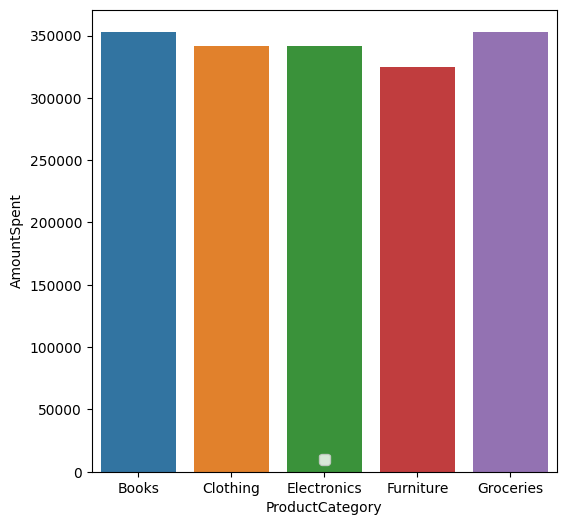

In [8]:
plt.figure(figsize=(6,6))
sns.barplot(x='ProductCategory',y='AmountSpent', data=x, hue='ProductCategory')
plt.legend(loc='lower center',fontsize=10, title_fontsize=12, ncol=5)

#### Customer Churn Behaviour wrt Customer service Category wise

In [9]:
counts = data.groupby(['InteractionType', 'ResolutionStatus', 'ChurnStatus']).size().unstack(fill_value=0)
counts1 = data.groupby(['ProductCategory','InteractionType', 'ResolutionStatus', 'ChurnStatus']).size().unstack(fill_value=0)
counts1

ChurnStatus                                         0   1
ProductCategory InteractionType ResolutionStatus         
Books           Complaint       Resolved          146  36
                                Unresolved        147  38
                Feedback        Resolved          177  36
                                Unresolved        144  37
                Inquiry         Resolved          130  27
                                Unresolved        119  33
                Not contacted   Not contacted     283  55
Clothing        Complaint       Resolved          138  27
                                Unresolved        135  48
                Feedback        Resolved          162  41
                                Unresolved        142  30
                Inquiry         Resolved          127  37
                                Unresolved        122  21
                Not contacted   Not contacted     270  48
Electronics     Complaint       Resolved          136  43
                                Unresolved        153  43
                Feedback        Resolved          176  58
                                Unresolved        115  34
                Inquiry         Resolved          123  36
                                Unresolved        125  32
                Not contacted   Not contacted     236  56
Furniture       Complaint       Resolved          111  33
                                Unresolved        152  35
                Feedback        Resolved          164  39
                                Unresolved        139  37
                Inquiry         Resolved          124  34
                                Unresolved        111  26
                Not contacted   Not contacted     252  67
Groceries       Complaint       Resolved          139  32
                                Unresolved        142  35
                Feedback        Resolved          164  52
                                Unresolved        140  34
                Inquiry         Resolved          118  27
                                Unresolved        111  31
                Not contacted   Not contacted     287  54

<Axes: xlabel='InteractionType,ResolutionStatus'>

<Figure size 1000x600 with 0 Axes>

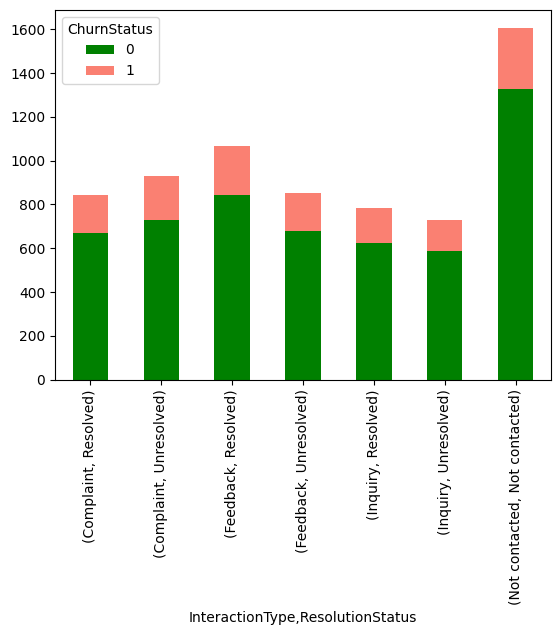

In [10]:
plt.figure(figsize=(10,6))
counts.plot(kind='bar', stacked=True, color=['green', 'salmon'])

#### Age wise product category intrests

In [11]:
age_product = data.groupby([(data['Age']//10)*10+10,'ProductCategory']).size().unstack(fill_value=0)

age_product['Total'] = age_product.sum(axis=1)
age_product

ProductCategory,Books,Clothing,Electronics,Furniture,Groceries,Total
Age,,,,,,
20,70,70,50,52,54,296
30,275,267,278,261,282,1363
40,267,258,232,232,256,1245
50,276,243,227,231,260,1237
60,285,270,271,293,284,1403
70,235,240,308,255,230,1268


<Axes: xlabel='Age'>

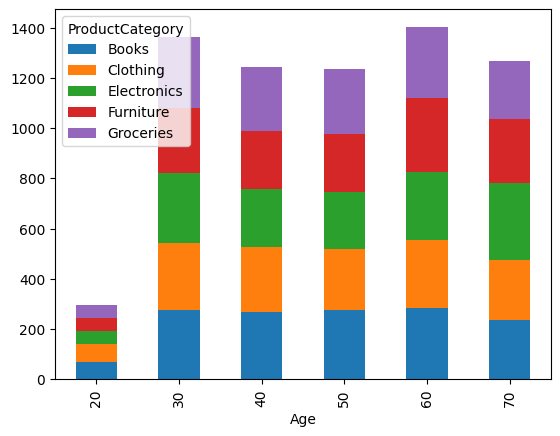

In [12]:
age_product.drop(columns=['Total']).plot(kind='bar', stacked=True,)

#### Age v/s churn

In [13]:
age_churn = data.groupby([(data['Age']//10)*10+10,'ChurnStatus']).size().unstack(fill_value=0)
age_churn

ChurnStatus,0,1
Age,,
20,235,61
30,1143,220
40,1007,238
50,971,266
60,1094,309
70,1010,258


<Axes: xlabel='Age'>

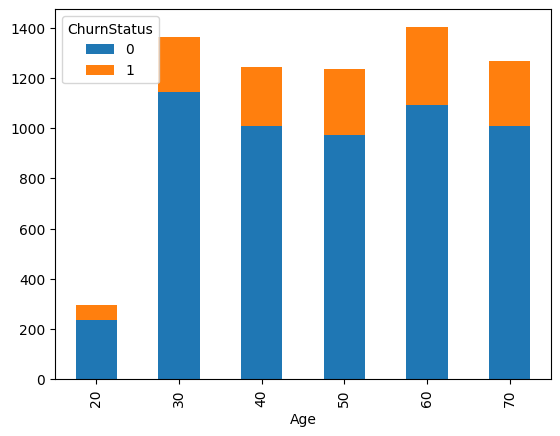

In [14]:
age_churn.plot(kind='bar',stacked=True)

In [15]:
data.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'TransactionID', 'TransactionDate', 'AmountSpent', 'ProductCategory',
       'InteractionID', 'InteractionDate', 'InteractionType',
       'ResolutionStatus', 'LastLoginDate', 'LoginFrequency', 'ServiceUsage',
       'ChurnStatus'],
      dtype='object')

In [16]:
data2 = data.drop(columns=['TransactionDate','InteractionDate','LastLoginDate'])
data2 = pd.get_dummies(data=data2)
columns_ = []
for a in data2.columns:
    columns_.append(a)

len(columns_)


31

<Axes: >

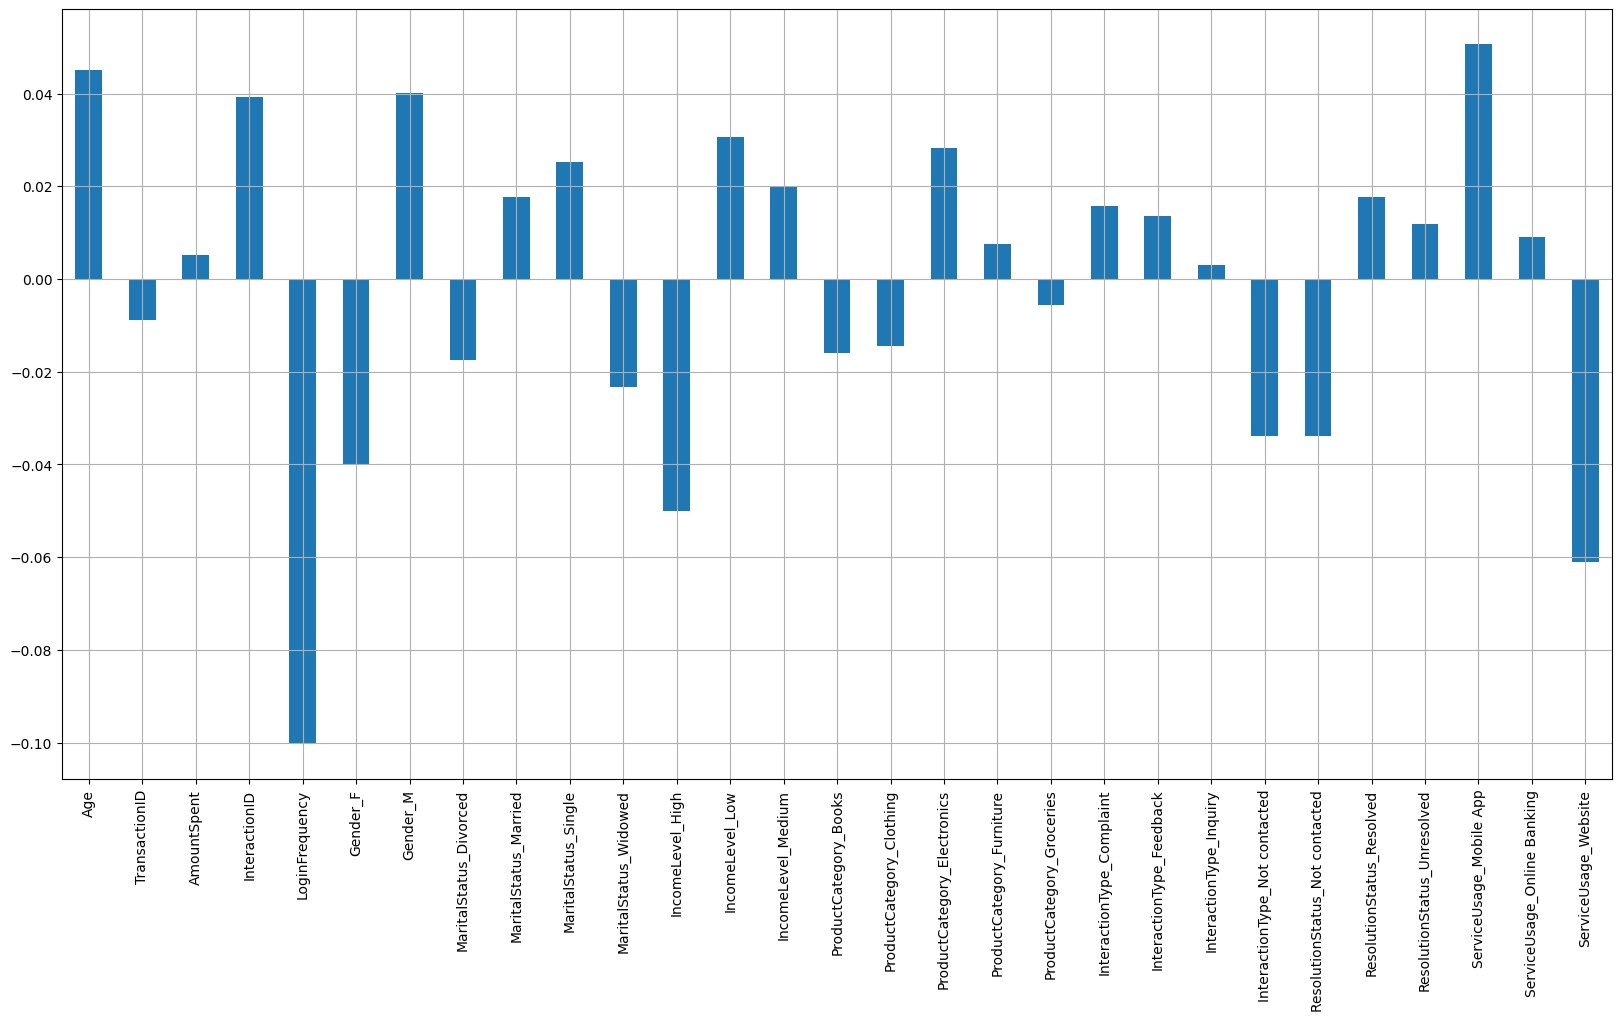

In [24]:
data3 =  data2.drop(columns=['ChurnStatus','CustomerID'])
data3.corrwith(data2['ChurnStatus']).plot.bar(figsize=(20,10),rot=90,grid=True)

In [25]:
corr = data3.corr()
corr

,Age,TransactionID,AmountSpent,InteractionID,LoginFrequency,Gender_F,Gender_M,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,...,InteractionType_Complaint,InteractionType_Feedback,InteractionType_Inquiry,InteractionType_Not contacted,ResolutionStatus_Not contacted,ResolutionStatus_Resolved,ResolutionStatus_Unresolved,ServiceUsage_Mobile App,ServiceUsage_Online Banking,ServiceUsage_Website
Age,1.000000,-0.000850,0.008301,-0.023638,-0.011603,0.014314,-0.014314,0.013756,0.005333,-0.029527,...,-0.025027,0.038004,-0.030898,0.015821,0.015821,0.009286,-0.023337,-0.046804,0.028316,0.018399
TransactionID,-0.000850,1.000000,-0.010189,-0.001382,-0.006556,0.006779,-0.006779,0.000149,-0.008794,0.033775,...,0.013805,-0.017061,0.002957,0.000929,0.000929,0.017206,-0.018256,-0.018458,0.010918,0.007514
AmountSpent,0.008301,-0.010189,1.000000,0.025219,0.028168,-0.000404,0.000404,0.005195,-0.003487,0.029229,...,0.007256,0.033164,-0.008383,-0.034426,-0.034426,0.010763,0.019396,-0.009276,-0.003613,0.013181
InteractionID,-0.023638,-0.001382,0.025219,1.000000,0.012199,0.049475,-0.049475,0.043563,-0.051479,0.059021,...,0.260729,0.266865,0.229679,-0.776851,-0.776851,0.358901,0.320088,-0.065091,0.045257,0.019513
LoginFrequency,-0.011603,-0.006556,0.028168,0.012199,1.000000,-0.073805,0.073805,0.050552,-0.057772,-0.010130,...,-0.010984,0.042566,-0.009131,-0.024823,-0.024823,-0.015024,0.037076,-0.038091,0.056502,-0.019608
Gender_F,0.014314,0.006779,-0.000404,0.049475,-0.073805,1.000000,-1.000000,-0.030240,-0.023772,0.006322,...,0.049156,0.008122,0.025687,-0.084510,-0.084510,0.044322,0.029470,0.001522,-0.035808,0.035462
Gender_M,-0.014314,-0.006779,0.000404,-0.049475,0.073805,-1.000000,1.000000,0.030240,0.023772,-0.006322,...,-0.049156,-0.008122,-0.025687,0.084510,0.084510,-0.044322,-0.029470,-0.001522,0.035808,-0.035462
MaritalStatus_Divorced,0.013756,0.000149,0.005195,0.043563,0.050552,-0.030240,0.030240,1.000000,-0.330485,-0.321412,...,0.054267,0.009905,-0.023655,-0.043367,-0.043367,-0.005338,0.043584,-0.034133,0.014134,0.020153
MaritalStatus_Married,0.005333,-0.008794,-0.003487,-0.051479,-0.057772,-0.023772,0.023772,-0.330485,1.000000,-0.297338,...,0.039371,-0.062244,-0.018758,0.043669,0.043669,-0.044353,0.006511,0.038074,-0.031438,-0.006281
MaritalStatus_Single,-0.029527,0.033775,0.029229,0.059021,-0.010130,0.006322,-0.006322,-0.321412,-0.297338,1.000000,...,-0.007869,-0.006960,0.051122,-0.034551,-0.034551,0.040261,-0.010390,-0.012581,0.030442,-0.018651


<Axes: >

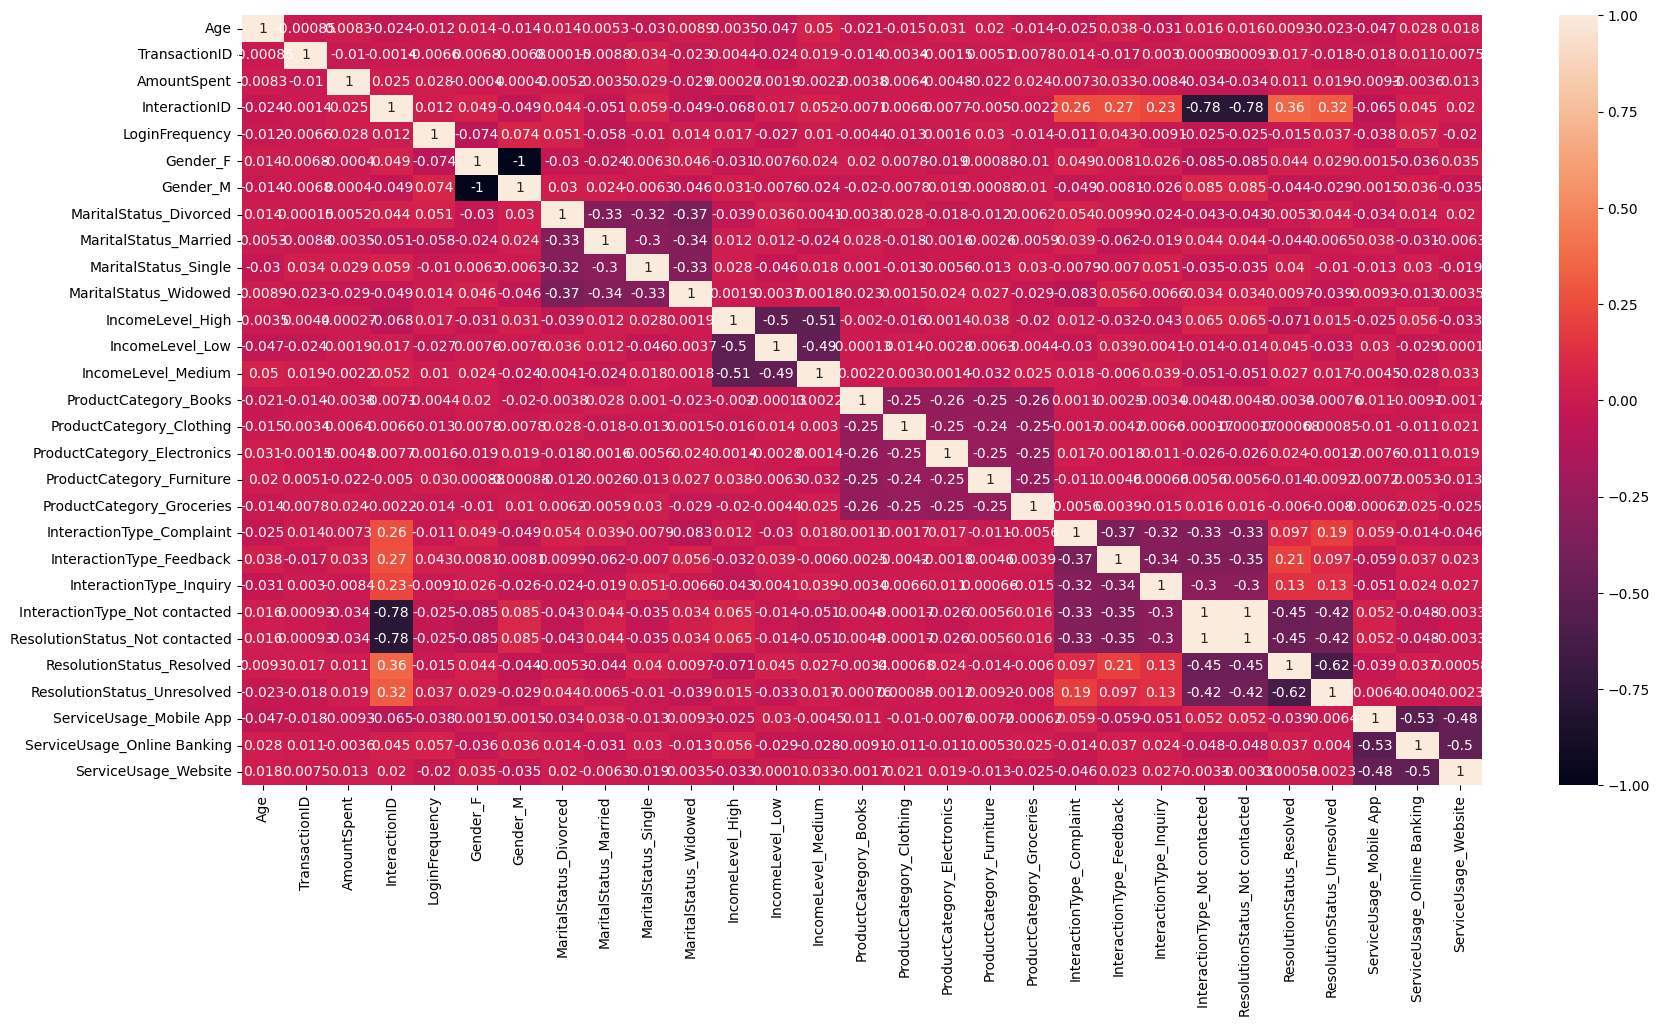

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)

<Axes: xlabel='ResolutionStatus_Resolved', ylabel='InteractionType_Complaint'>

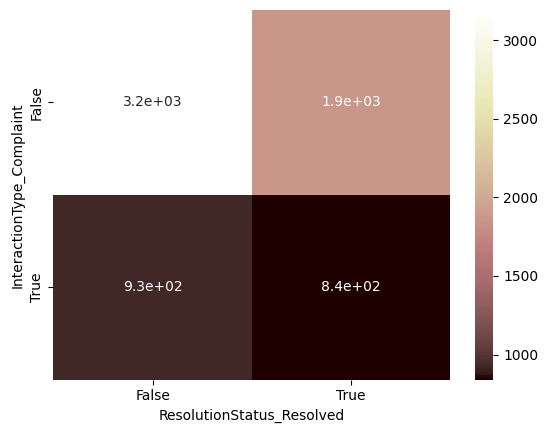

In [93]:
crosstab = pd.crosstab(data3['InteractionType_Complaint'],data3['ResolutionStatus_Resolved'])
sns.heatmap(crosstab,annot=True, cmap='pink')

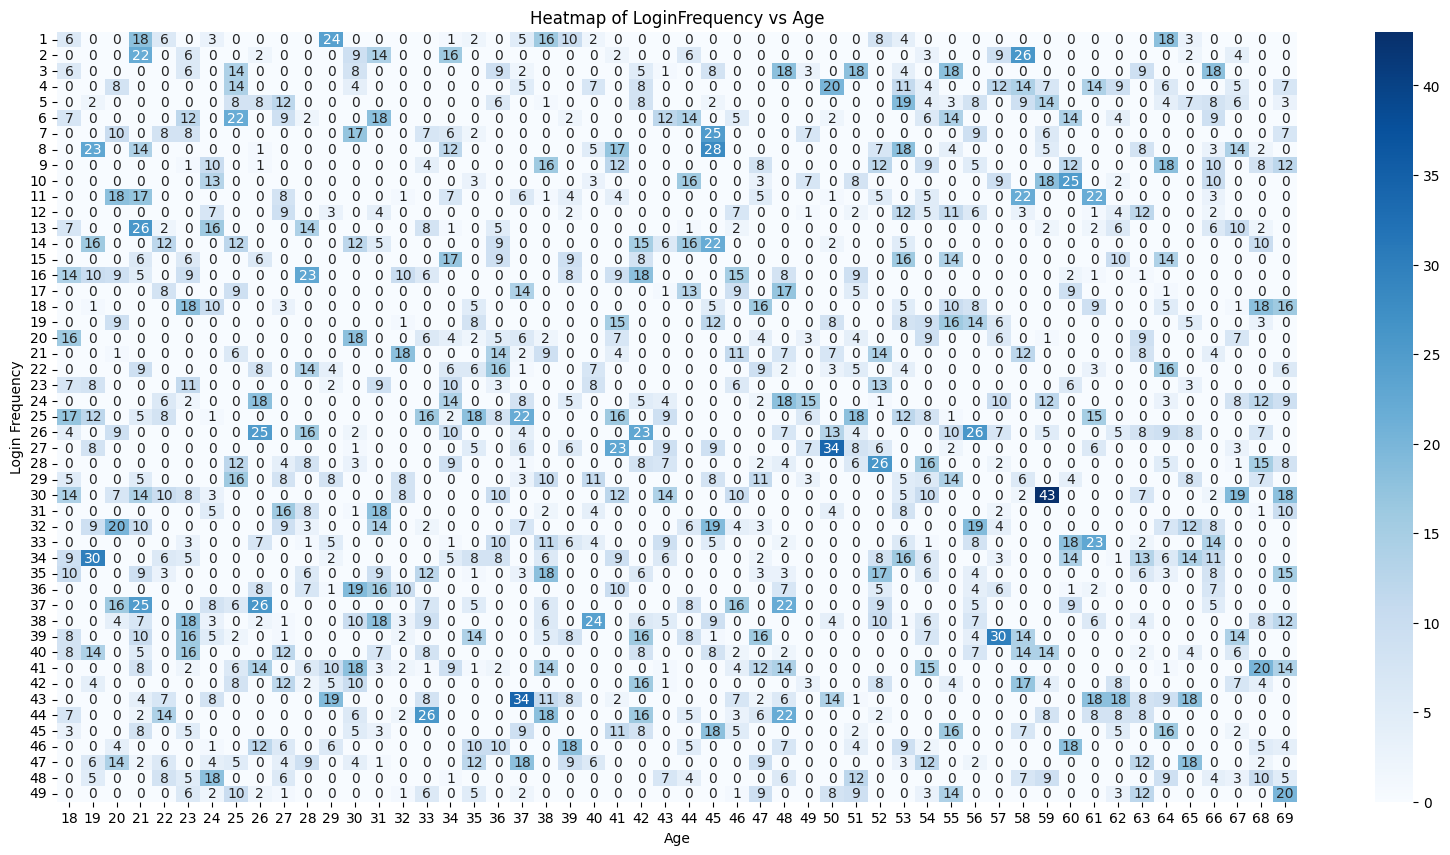

In [99]:
# Crosstab for frequency distribution
crosstab = pd.crosstab(data3['LoginFrequency'], data3['Age'])

# Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(crosstab, annot=True, cmap='Blues')
plt.title('Heatmap of LoginFrequency vs Age')
plt.xlabel('Age')
plt.ylabel('Login Frequency')
plt.show()


<Axes: xlabel='Age'>

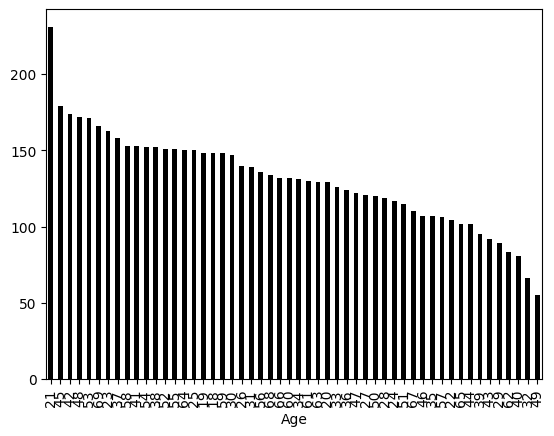

In [98]:
data['Age'].value_counts().plot(kind='bar',color='black')
